In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('bioinformatika.csv')

In [3]:
df

,Группа,Группа крови,Резус фактор,После 40,Пол,Hu IL-1b (39),Hu IL-1ra (25),Hu IL-2 (38),Hu IL-4 (52),Hu IL-5 (33),...,Hu GM-CSF (34),Hu IFN-g (21),Hu IP-10 (48),Hu MCP-1(MCAF) (53),Hu MIP-1a (55),Hu PDGF-bb (47),Hu MIP-1b (18),Hu RANTES (37),Hu TNF-a (36),Hu VEGF (45)
0,Ж до 40 O+,O,+,нет,Ж,2.810,420.975,3.325,1.965,6.589392,...,0.748089,7.075,298.725,5.260,1.715000,5258.52000,99.765,1315.225000,22.670,32.505830
1,Ж до 40 O+,O,+,нет,Ж,3.120,317.420,2.765,2.255,6.226458,...,0.765835,6.390,214.625,9.855,6.445000,5693.66500,165.320,2113.179391,30.135,30.326807
2,Ж после 40,O,+,да,Ж,3.760,1692.030,3.220,3.665,6.974583,...,1.885000,19.955,254.300,16.470,4.450000,7236.68000,132.850,2102.928217,28.350,182.255000
3,Ж после 40,O,+,да,Ж,3.595,497.170,2.605,3.495,9.400000,...,0.772338,8.455,259.580,13.885,1.505000,7372.07000,183.075,2416.274857,27.150,84.775000
4,М до 40 O+,O,+,нет,М,3.520,920.655,3.210,2.855,4.833021,...,1.485000,13.845,222.250,15.150,8.785000,8310.80500,122.615,340.370000,19.075,43.423769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Ж после 40 АB-,AB,-,да,Ж,144.360,10329.560,8.190,1.640,23.970000,...,2.800000,99.960,515.770,16.510,45.740000,33808.45459,204.980,4316.410000,51.490,278.640000
60,М до 40 АB-,AB,-,нет,М,239.070,5377.960,22.490,9.380,53.780000,...,7.350000,63.640,354.200,24.320,216.480000,14733.26000,565.790,3724.960000,175.450,293.630000
61,М до 40 АB-,AB,-,нет,М,3.800,720.830,3.935,4.390,22.804931,...,2.420000,6.055,223.570,11.570,6.040000,5025.16000,85.460,1934.030000,9.740,218.960000
62,М после 40 АB-,AB,-,да,М,51.790,5041.390,10.375,5.165,24.995000,...,4.115000,54.425,270.775,18.555,100.808527,6528.73000,436.180,2543.060713,71.715,214.785000


In [4]:
# обозначим предикторы
predictors = df.columns[0:4]

C:\Users\vanya\AppData\Local\Temp/ipykernel_24140/1423408421.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sns.heatmap(df.drop(predictors, 1).corr().abs(), ax=ax, cmap = 'YlOrBr', \


<AxesSubplot:>

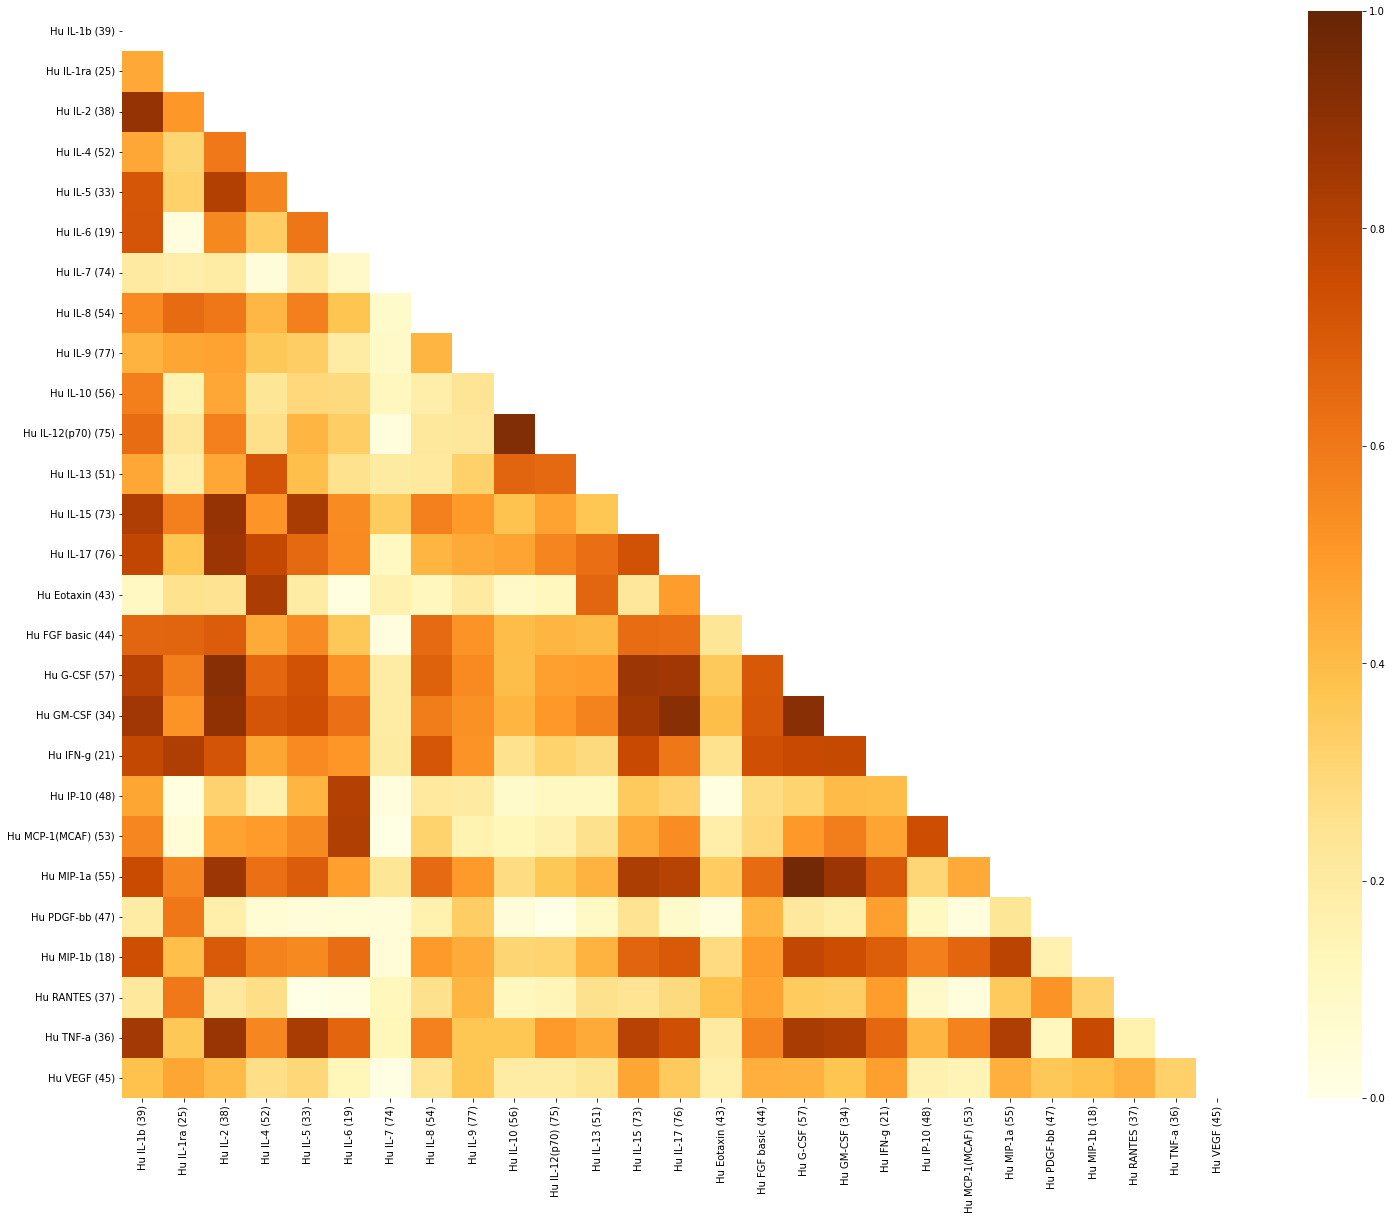

In [5]:
# взглянем на корреляции между факторами
mask = np.zeros((27,27))
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(df.drop(predictors, 1).corr().abs(), ax=ax, cmap = 'YlOrBr', \
            annot = False, vmin=0, vmax=1, mask=mask)

In [6]:
# есть сильно скоррелированные признаки

Посмотрим на переменную Hu IL-1b (39)

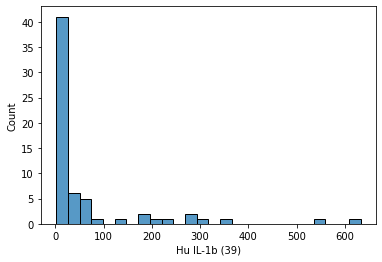

In [7]:
ax = sns.histplot(df['Hu IL-1b (39)'])

In [8]:
# распределение ??

In [9]:
tukey = pairwise_tukeyhsd(endog=df['Hu IL-1b (39)'], groups=df['Группа'], alpha=0.05)

In [10]:
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------
    Ж до 40 A+     Ж до 40 A-    -69.07    1.0 -531.5042 393.3642  False
    Ж до 40 A+     Ж до 40 B+  -70.1925    1.0 -532.6267 392.2417  False
    Ж до 40 A+     Ж до 40 B-       5.3    1.0 -457.1342 467.7342  False
    Ж до 40 A+     Ж до 40 O+  -92.0125    1.0 -554.4467 370.4217  False
    Ж до 40 A+     Ж до 40 O-  -88.1825    1.0 -550.6167 374.2517  False
    Ж до 40 A+    Ж до 40 АB+    -91.42    1.0 -553.8542 371.0142  False
    Ж до 40 A+    Ж до 40 АB-  -89.1575    1.0 -551.5917 373.2767  False
    Ж до 40 A+     Ж после 40     -91.3    1.0 -553.7342 371.1342  False
    Ж до 40 A+  Ж после 40 A+  -70.3925    1.0 -532.8267 392.0417  False
    Ж до 40 A+  Ж после 40 A-   -91.465    1.0 -553.8992 370.9692  False
    Ж до 40 A+  Ж после 40 B+   -90.185    1.0 -552

In [11]:
# статистически значимых различий между группами не выявленно